In [7]:
import cv2
import kornia as K
import kornia.feature as KF
import matplotlib.pyplot as plt
import numpy as np
import torch
import tqdm
import time
from kornia_moons.feature import *
from kornia_moons.viz import *

device = torch.device("cpu")

In [12]:
descriptor = KF.TFeat(True)
sift = OpenCVDetectorWithAffNetKornia(cv2.SIFT_create(8000))
feature = KF.LocalFeature(sift, KF.LAFDescriptor(descriptor))
output_extension = ".afnetTFeat"

durations = []

# Process the file
with open("image_list_hpatches_sequences.txt", 'r') as f:
    lines = [line.strip() for line in f.readlines()]

for path in lines:

    starttime = time.time()
    image = K.io.load_image(path, K.io.ImageLoadType.RGB32, device=device)[None, ...]

    with torch.inference_mode():
        keypoints, scores, descriptors = feature(K.color.rgb_to_grayscale(image))
    
    total = round((time.time() - starttime), 2)
    durations.append(total)

    

    with open(path + output_extension, 'wb') as output_file:
        np.savez(
            output_file,
            keypoints=keypoints,
            scores=scores,
            descriptors=descriptors
            )
        
    print(f"Processed {path} in {total} seconds")


Processed hpatches_sequences/hpatches-sequences-release/v_vitro/5.ppm in 68.02 seconds
Processed hpatches_sequences/hpatches-sequences-release/v_vitro/2.ppm in 3.74 seconds
Processed hpatches_sequences/hpatches-sequences-release/v_vitro/4.ppm in 2.96 seconds
Processed hpatches_sequences/hpatches-sequences-release/v_vitro/1.ppm in 3.82 seconds
Processed hpatches_sequences/hpatches-sequences-release/v_vitro/3.ppm in 3.44 seconds
Processed hpatches_sequences/hpatches-sequences-release/v_vitro/6.ppm in 3.22 seconds
Processed hpatches_sequences/hpatches-sequences-release/v_apprentices/5.ppm in 3.64 seconds
Processed hpatches_sequences/hpatches-sequences-release/v_apprentices/2.ppm in 4.52 seconds
Processed hpatches_sequences/hpatches-sequences-release/v_apprentices/4.ppm in 3.62 seconds
Processed hpatches_sequences/hpatches-sequences-release/v_apprentices/1.ppm in 4.33 seconds
Processed hpatches_sequences/hpatches-sequences-release/v_apprentices/3.ppm in 4.41 seconds
Processed hpatches_sequ

KeyboardInterrupt: 

In [55]:
#np.load("hpatches_sequences/hpatches_sequences/i_ajuntament/1.ppm")
a = np.load("hpatches_sequences/hpatches-sequences-release/i_ajuntament/1.ppm.afnetTFeat")

print(a["descriptors"].shape)
print(a["keypoints"][:,:,:,0].shape)



#print(a["keypoints"])

(1, 836, 128)
(1, 836, 2)


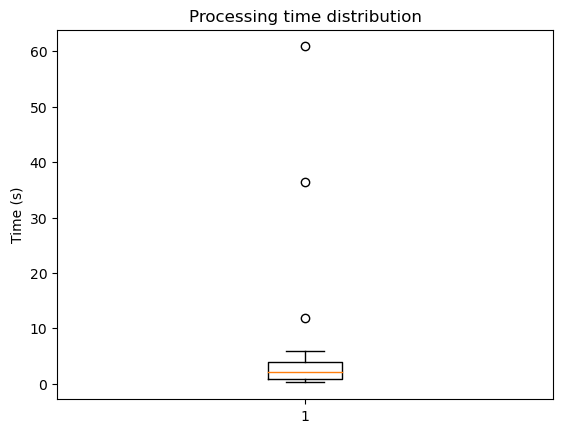

In [11]:
# Plot the distribution of processing times as a boxplot
plt.boxplot(durations)
plt.title("Processing time distribution")
plt.ylabel("Time (s)")
plt.show()